Import all required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.reset_index(drop=True,inplace=True)

Initial pre-processing

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.shape

(32581, 12)

In [9]:
df.duplicated().sum()

165

In [10]:
df.drop_duplicates(inplace=True)

Checking for Nulls

In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

We have 32000 rows of data in those 887 of them do no have emp_length.As this is less than 3% of the actual volumne,I will drop these rows****

In [12]:
df.dropna(subset=['person_emp_length'],inplace=True)

In [13]:
df.shape

(31529, 12)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
imputer=KNNImputer(n_neighbors=4)
df_impute = imputer.fit_transform(df[['loan_int_rate']])
df_impute=pd.DataFrame(df_impute)
df_impute.rename(columns={0:'loan_int_rate1'},inplace=True)
df=pd.concat([df,df_impute],axis=1)
df.drop(['loan_int_rate'],inplace=True,axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate1
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...
31524,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30,13.16
31525,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19,7.49
31526,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28,10.99
31527,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26,11.48


In [16]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_int_rate1                0
dtype: int64

Nulls Imputed

# Identify Categorical Features

In [17]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16011
MORTGAGE    13021
OWN          2391
OTHER         106
Name: count, dtype: int64

In [18]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6248
MEDICAL              5869
VENTURE              5521
PERSONAL             5348
DEBTCONSOLIDATION    5044
HOMEIMPROVEMENT      3499
Name: count, dtype: int64

In [19]:
df['loan_grade'].value_counts()

loan_grade
A    10301
B    10124
C     6303
D     3550
E      951
F      236
G       64
Name: count, dtype: int64

# Visualization

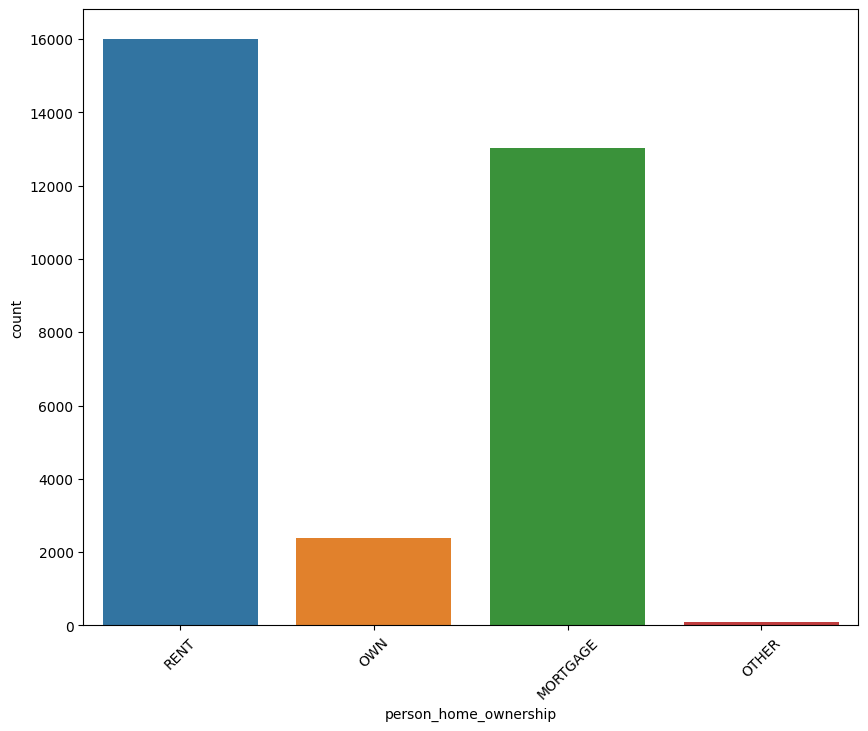

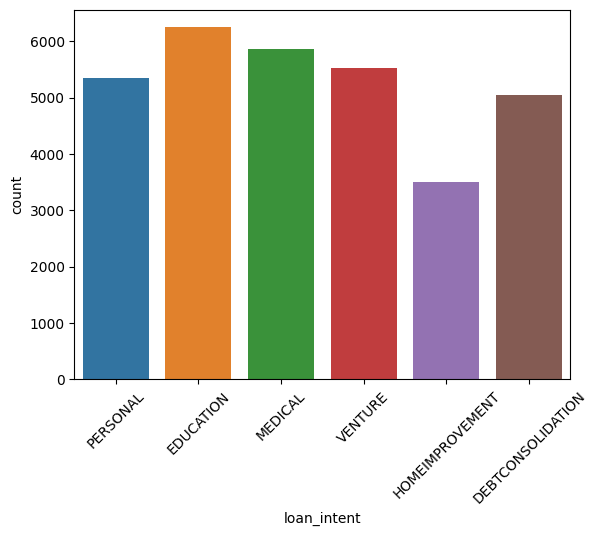

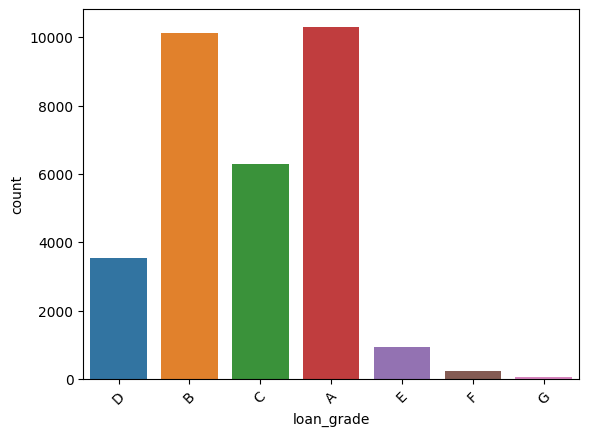

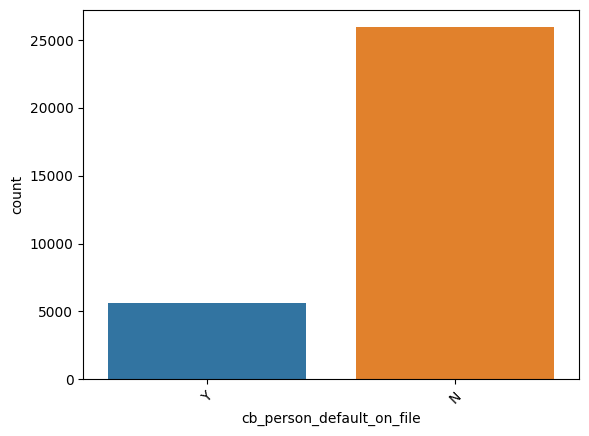

In [20]:
plt.figure(figsize=(10, 8))
for col in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]:
    sns.countplot(data= df, x=col)
    plt.xticks(rotation= 45)
    plt.show()

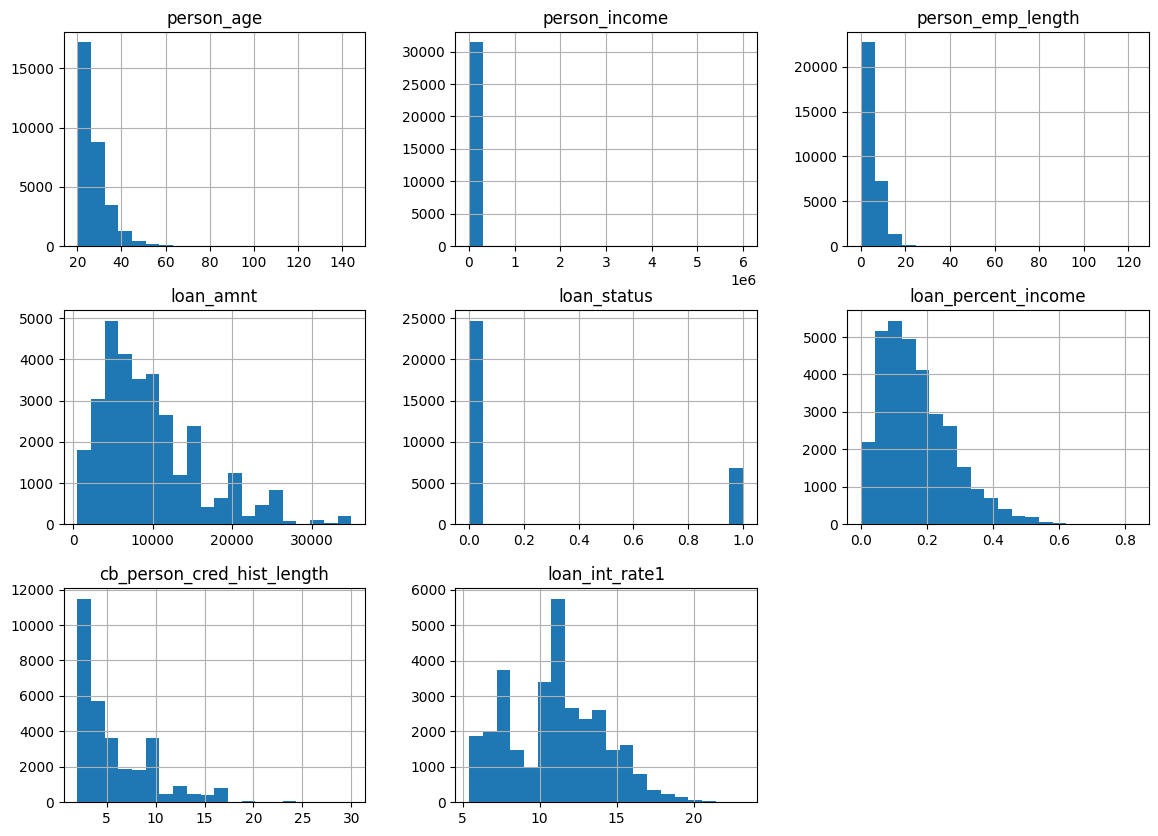

In [21]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

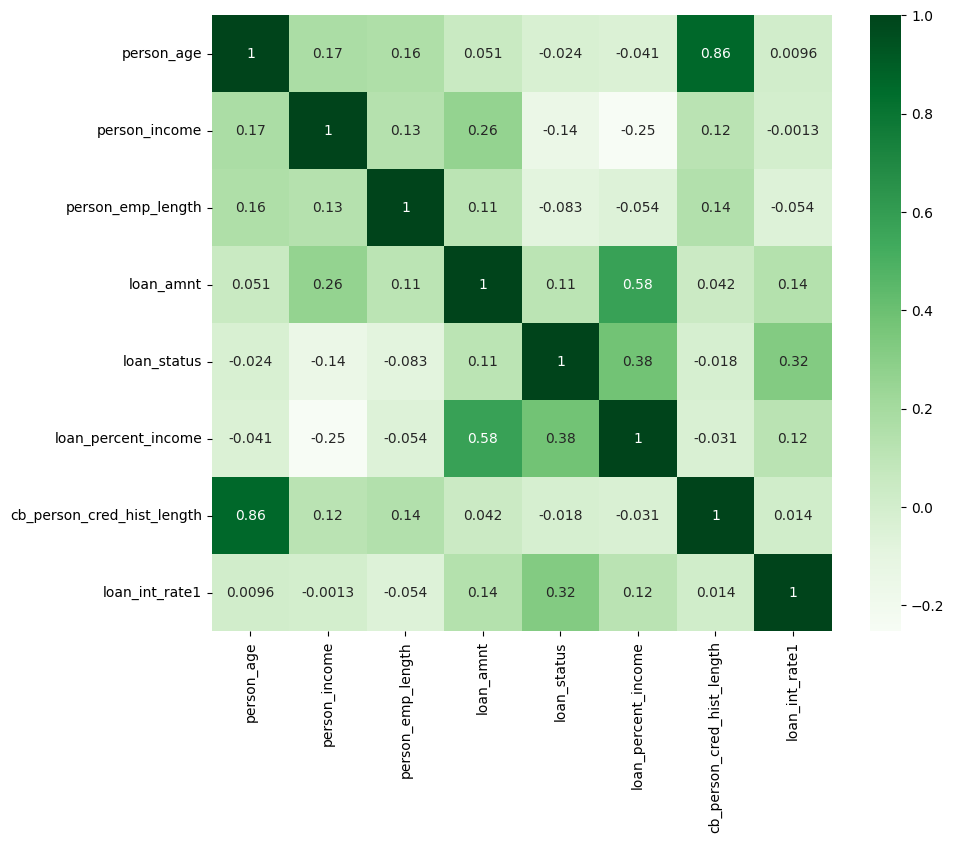

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='Greens')
plt.show()

# Handeling Outliers

<Axes: >

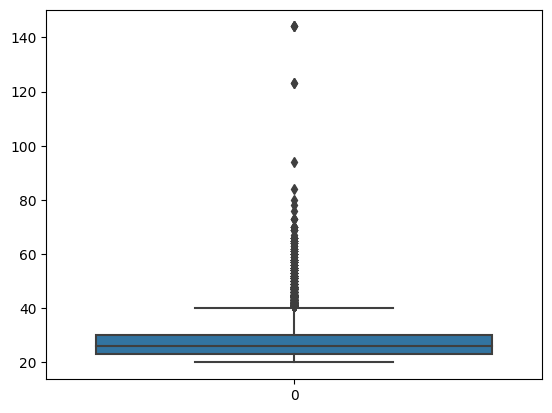

In [23]:
sns.boxplot(df['person_age'])

In [24]:
df = df[df["person_age"] < 80]

<Axes: >

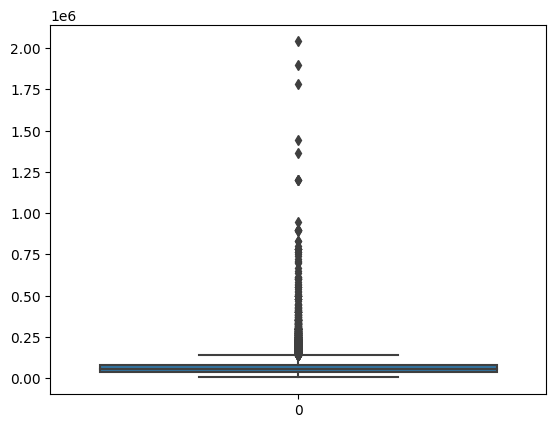

In [25]:
sns.boxplot(df['person_income'])

In [26]:
df['person_income'].max()

2039784

In [27]:
df = df[df['person_income'] < 1500000]

<Axes: >

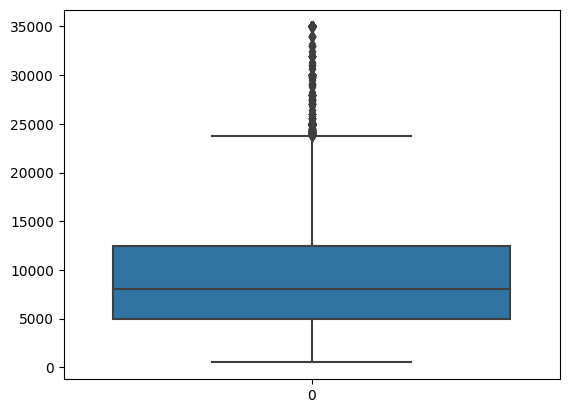

In [28]:
sns.boxplot(df['loan_amnt'])

<Axes: >

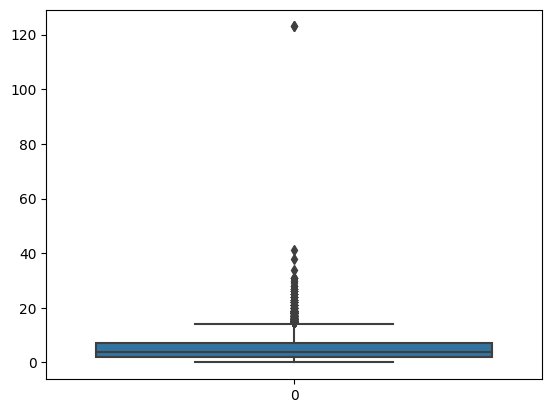

In [29]:
sns.boxplot(df['person_emp_length'])

In [30]:
df = df[df['person_emp_length'] <= 80]

In [31]:
df.shape

(31516, 12)

# Encoding Categorical valaues

In [32]:
dict={
    'Y':1,
    'N':0
      }

In [33]:
df['cb_person_default_on_file'].replace(dict,inplace=True)

In [34]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_int_rate1,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_1
1,21,9600,5.0,1000,0,0.10,2,11.14,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,1,0.57,3,12.87,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,1,0.53,2,15.23,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,1,0.55,4,14.27,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,1,0.25,2,7.14,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31524,57,53000,1.0,5800,0,0.11,30,13.16,False,False,...,False,True,False,False,True,False,False,False,False,False
31525,54,120000,4.0,17625,0,0.15,19,7.49,False,False,...,False,True,False,False,False,False,False,False,False,False
31526,65,76000,3.0,35000,1,0.46,28,10.99,False,False,...,False,False,False,True,False,False,False,False,False,False
31527,56,150000,5.0,15000,0,0.10,26,11.48,False,False,...,False,True,False,True,False,False,False,False,False,False


In [35]:
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate1', 'loan_percent_income', 'cb_person_cred_hist_length']

# Scaling

In [36]:
scaler=StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [37]:
df.shape

(31516, 23)

# Train Test split

In [38]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
def shape(x):
  print(x.shape)

shape(X_train)
shape(X_test)
shape(y_train)
shape(y_test)

(25212, 22)
(6304, 22)
(25212,)
(6304,)


# Class Imbalance

In [41]:
sm=SMOTE()

In [42]:
X_train, y_train=sm.fit_resample(X_train,y_train)

# MODEL BUILDING

In [43]:
models = {
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [44]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

[LightGBM] [Info] Number of positive: 19757, number of negative: 19757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1815
[LightGBM] [Info] Number of data points in the train set: 39514, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Support Vector Machine  0.882138   0.716111  0.746302  0.730895  0.903328
K-Nearest Neighbors     0.815514   0.551109  0.753698  0.636676  0.850222
Decision Tree           0.867069   0.669749  0.750000  0.707606  0.824515
Logistic Regression     0.812659   0.545358  0.760355  0.635156  0.862173
Random Forest           0.922272   0.887590  0.730030  0.801136  0.922820
AdaBoost                0.849937   0.624083  0.755178

#  Our top 3 classifiers are 
# 1.LightGBM 
# 2.XGBoost.
# 3.Random Forest
